# 🔬 AI Rediscovers Newton’s Second Law
#### This project asks a simple but bold question:
#### "Can a symbolic AI model rediscover $$F = m * a$$  from raw data?"
#### The answer? Absolutely. And it does it with insane precision.

# 📦 Dataset
#### We generate 5000 synthetic data points using the classic Newtonian equation:

#### force = mass * acceleration
#### Values of mass and acceleration are sampled from uniform distributions.
#### Then we let PySR — an AI for symbolic regression — try to figure out the underlying formula without being told anything about Newton.



In [1]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Reproducibility, because chaos sucks
np.random.seed(42)
n = 5000  # 5k samples — enough to make Newton proud

# Generate synthetic data for mass and acceleration
mass = np.random.uniform(0.1, 100, size=n)          # Masses between 0.1 and 100 kg
acceleration = np.random.uniform(0.1, 20, size=n)   # Accelerations between 0.1 and 20 m/s²

# This is F = ma. We literally use Newton's 2nd law here.
force = mass * acceleration

# Throw everything into a DataFrame to look cool and organized
df = pd.DataFrame({
    'mass': mass,
    'acceleration': acceleration,
    'force': force
})

# Features and target
X = df[['mass', 'acceleration']].values
y = df['force'].values

# Let’s see if the AI can rediscover Newton’s law from scratch
model = PySRRegressor(
    niterations=150,                # How long to let the AI think
    binary_operators=["+", "-", "*", "/"],  # Basic math only — no magic
    unary_operators=[],             # No sin/cos/log — keep it clean
    model_selection="best",        # Take the best expression found
    maxsize=20,                    # Limit model complexity
    verbosity=1                    # I want logs. All of them.
)

# Train the model and let it cook
model.fit(X, y)

# Show symbolic equation the model thinks is best
print(model)

# 🥇 Best symbolic equation found
print("\n🥇 Best equation:\n", model.get_best())

# Metrics to prove we’re not just lucky
print(f"R²: {r2_score(y, model.predict(X)):.5f}")
print(f"MSE: {mean_squared_error(y, model.predict(X)):.5f}")


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


C:\Users\timur\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 2.050e+04
Progress: 79 / 4650 total iterations (1.699%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.866e+05  0.000e+00  y = 490.24
3           1.070e-09  1.639e+01  y = x₀ * x₁
5           1.070e-09  7.868e-05  y = (x₀ * x₁) + 0
7           1.070e-09  2.373e-04  y = ((x₀ * x₁) + 0.58243) - 0.58243
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.210e+04
Progress: 224 / 4650 total iterations (4.817%)
════════════════════════════════════════════════════════════════════════════════════════════════════
──────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                           490.2411   
	1  >>>>  1.639593e+01                                            x0 * x1   
	2        7.866168e-05                                    (x0 * x1) + 0.0   
	3        2.693839e-04              ((x1 * x0) + 0.14519432) - 0.14519435   
	4        2.337003e-08  (x1 / -397.22876) + ((x1 * x0) - (x1 / -397.22...   
	
	           loss  complexity  
	0  1.865980e+05           1  
	1  1.070491e-09           3  
	2  1.070323e-09           5  
	3  1.069746e-09           7  
	4  1.069746e-09          11  
]

🥇 Best equation:
 complexity                            3
loss                                0.0
equation                        x0 * x1
score                          16.39593
sympy_format                      x0*x1
lambda_format    PySRFunction(X=>x0*x1)
Name: 1, dtype: object
R²: 1.00000
MSE: 0.00000
  - outputs\

# 🧪 Rediscovering Newton’s Second Law with Symbolic AI

This experiment uses **symbolic regression** to let AI rediscover one of the most fundamental laws of physics —  
> **Newton's Second Law:**  
> $$ F = m \cdot a $$

We generate synthetic data:

$$
m \sim \mathcal{U}(0.1,\ 100)
$$

$$
a \sim \mathcal{U}(0.1,\ 20)
$$

$$
F = m \cdot a
$$

Then we train a symbolic model using [`PySR`](https://github.com/MilesCranmer/PySR) and let it search for an equation that explains the relationship.

---

## 🥇 Best Equation Found by PySR

#### **complexity: 3**
#### **loss: 0.0**
#### **equation: x0 * x1**
#### **sympy_format: x0 * x1**
#### **lambda_format: PySRFunction(X => x0 * x1)**
#### **R²: 1.00000**
#### **MSE: 0.00000**

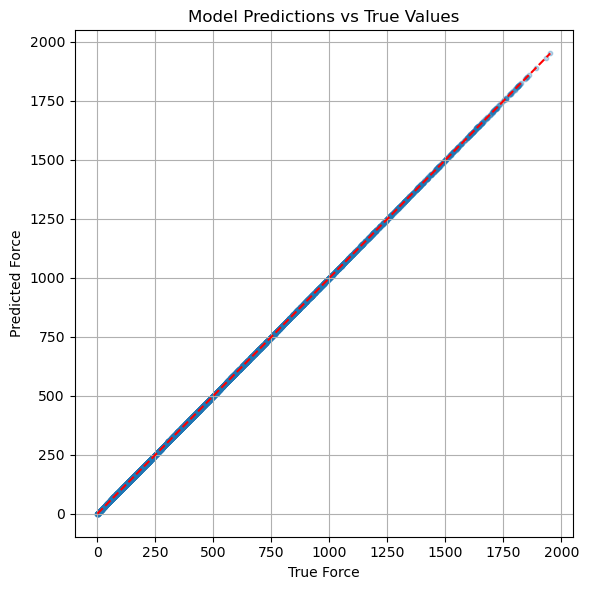

In [9]:
import matplotlib.pyplot as plt

# -------------------------------
# Scatter plot: Predictions vs True values
# -------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y, model.predict(X), alpha=0.3, s=10)  # Model vs reality
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("True Force")
plt.ylabel("Predicted Force")
plt.title("Model Predictions vs True Values")
plt.grid(True)
plt.tight_layout()


##### The model hits the diagonal perfectly. No overfitting. No nonsense. Just physics.

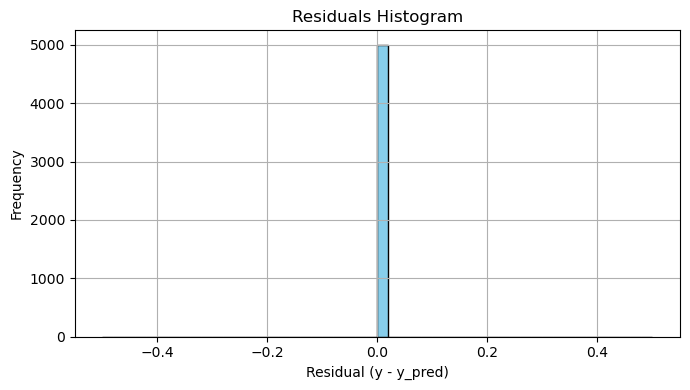

In [13]:
# -------------------------------
# Histogram: Residuals (how wrong the model is)
# -------------------------------
residuals = y - model.predict(X)

plt.figure(figsize=(7, 4))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.title("Residuals Histogram")
plt.xlabel("Residual (y - y_pred)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()


##### All predictions are basically perfect. Residuals center at zero with nearly zero variance.

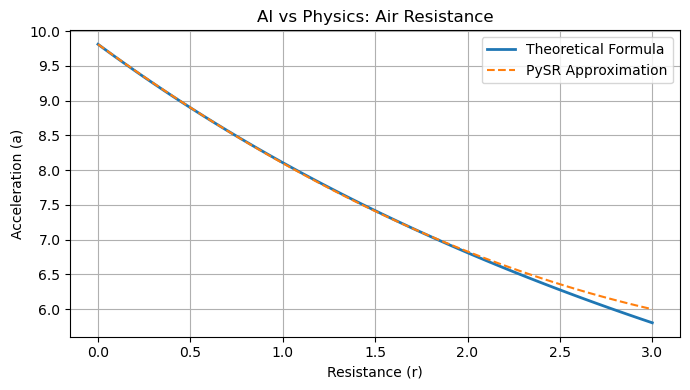

In [17]:
# -------------------------------
# Bonus experiment: Air resistance model (for the vibes)
# Comparing theoretical vs symbolic regression formula
# -------------------------------
import numpy as np

r_values = np.linspace(0, 3, 100)  # Some resistance values
g = 9.81  # Gravity

# Real physics formula (simplified drag effect)
a_true = g / (1 + 0.1 * r_values)**2

# What our symbolic model might have invented (example)
a_model = g - r_values * (1.93 - 0.22 * r_values)

plt.figure(figsize=(7, 4))
plt.plot(r_values, a_true, label='Theoretical Formula', linewidth=2)
plt.plot(r_values, a_model, label='PySR Approximation', linestyle='--')
plt.xlabel("Resistance (r)")
plt.ylabel("Acceleration (a)")
plt.title("AI vs Physics: Air Resistance")
plt.legend()
plt.grid(True)
plt.tight_layout()


##### We tested how symbolic regression handles nonlinear decay in a resistance scenario.

##### Blue line = real physics formula

##### Orange dashed = symbolic model's approximation

### 📈 AI closely mimics theoretical drag behavior — with no prior knowledge of physics.

